# 2024 NFL Big Data Bowl - A Statistical Analysis on Tackling
#### Ben Millman | Undergraduate Track

## 1. Introduction 
The focus of this year's Big Data Bowl is the sole focus of all defenses in football, tackling. The task was to create useful metrics and to evaluate players on aspects of tackling. This was an awesome opprotunity as a football player and data analytics student to combine my passions. I focused on a two pronged approach:
    
   **1.    Measuring tackle probability as a function of distance.** </br>
   **2.    Predicting the location of tackles.**

With 1 we can evaluate players' tackle probabilty at various distances and quantify their tackling range.

With 2 we can assign value to tackles by making predictions with the tackling player masked.
  

## 2. Modelling Tackle Probability and Range
Quantifying a player's tackle range can be a bit tricky. There are many potential ways to define tackle range. My approach was to use a Logistic Regression model. 

### 2.1 Logistic Regression Model Specification 
On every frame we can assign a 1 if a player made the tackle, and a 0 otherwise, this provides us a Bernoulli distribution where 1 is a tackle or success. 

In other words:

**Random component:**
    
$$ Y_i \sim Bernoulli(π_i) $$
   

where $Y_i$ is the ith tackle and $π_i$ is the probability of a tackle.
   
**Link Function:**

$$ g(\pi_i) = \eta_i = \log\left(\frac{\pi_i}{1-\pi_i}\right) $$

where the log(odds of a tackle) are set equal to the linear predictor this is to ensure predicted probabilties are between 1 and 0 and fit the underlying distribution.

**Linear Predictor:**

$$ \eta_i = \beta_0 + \beta_1x_1i + \beta_2x_2i $$

where $x_1$ is distance to the ball carrier and $x_2$ is the interaction between distance and name.

### 2.2 Logistic Regression Model Results
*Ignore curves with a positive or 0 slope as these are data errors or players with few tackle opprotunities*
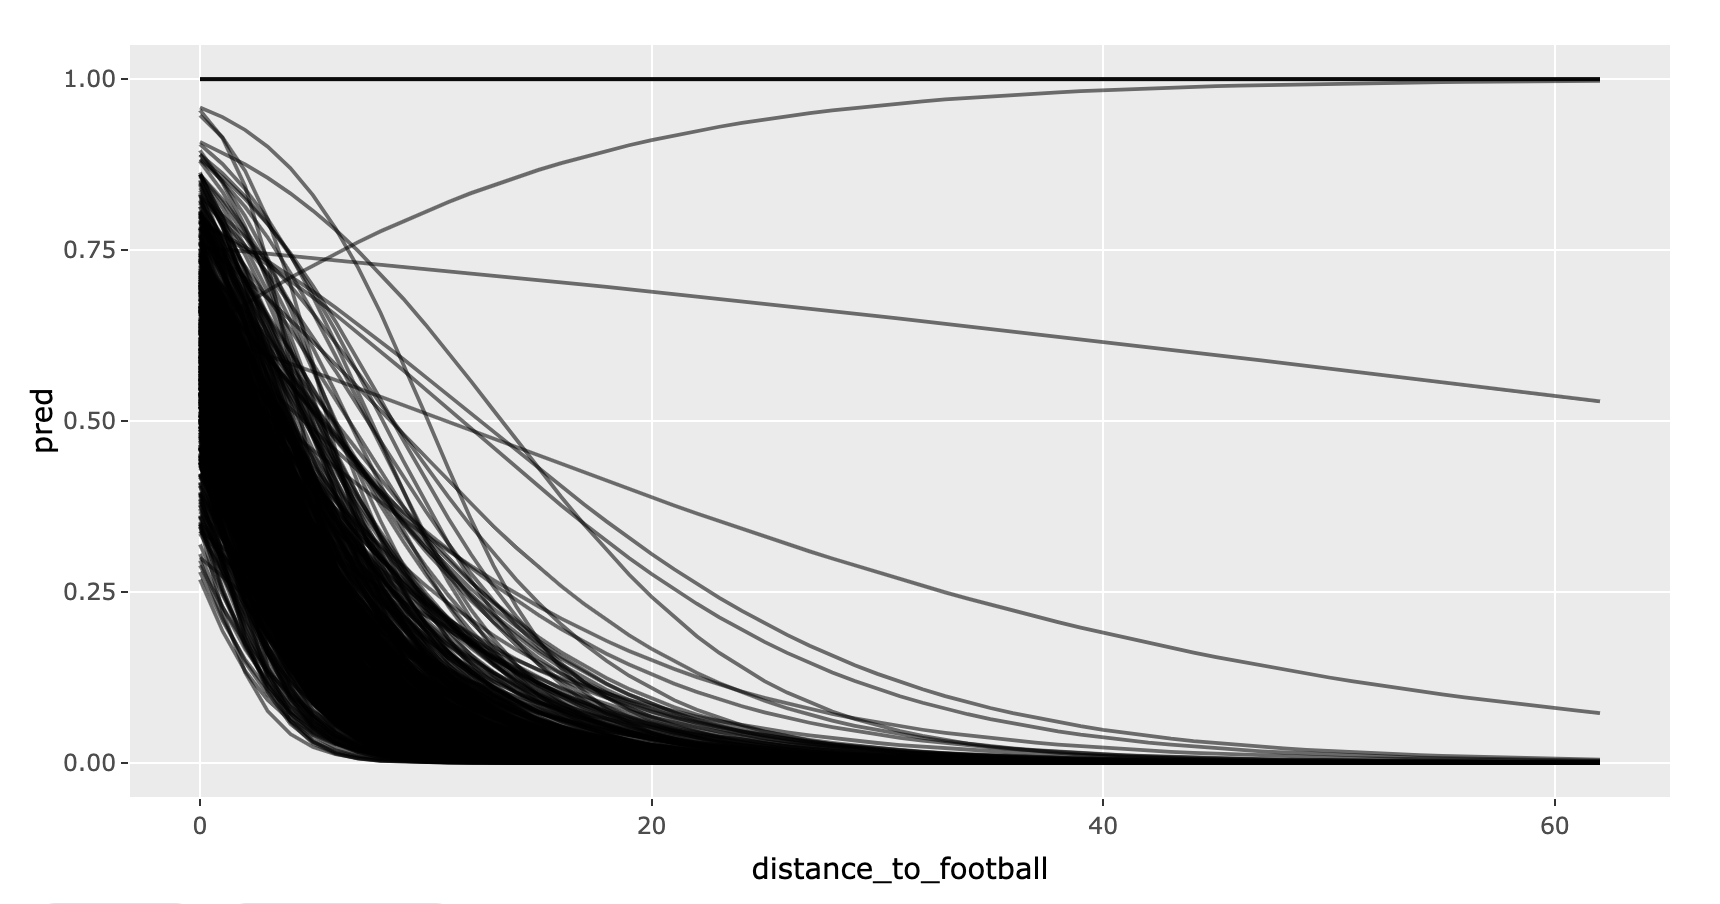

<div align="center"><strong>Figure 1:</strong> Predicted tackle probabilities by distance for every tackler.</div></br>

Here we can see the curves for each tackler. As expected, the probability of a successful tackle increases as distance decreases. This alone isn't very helpful. Below are a few more helpful visualizations.


*All results in this report include only players with more than 10 tackle opprotunities* 


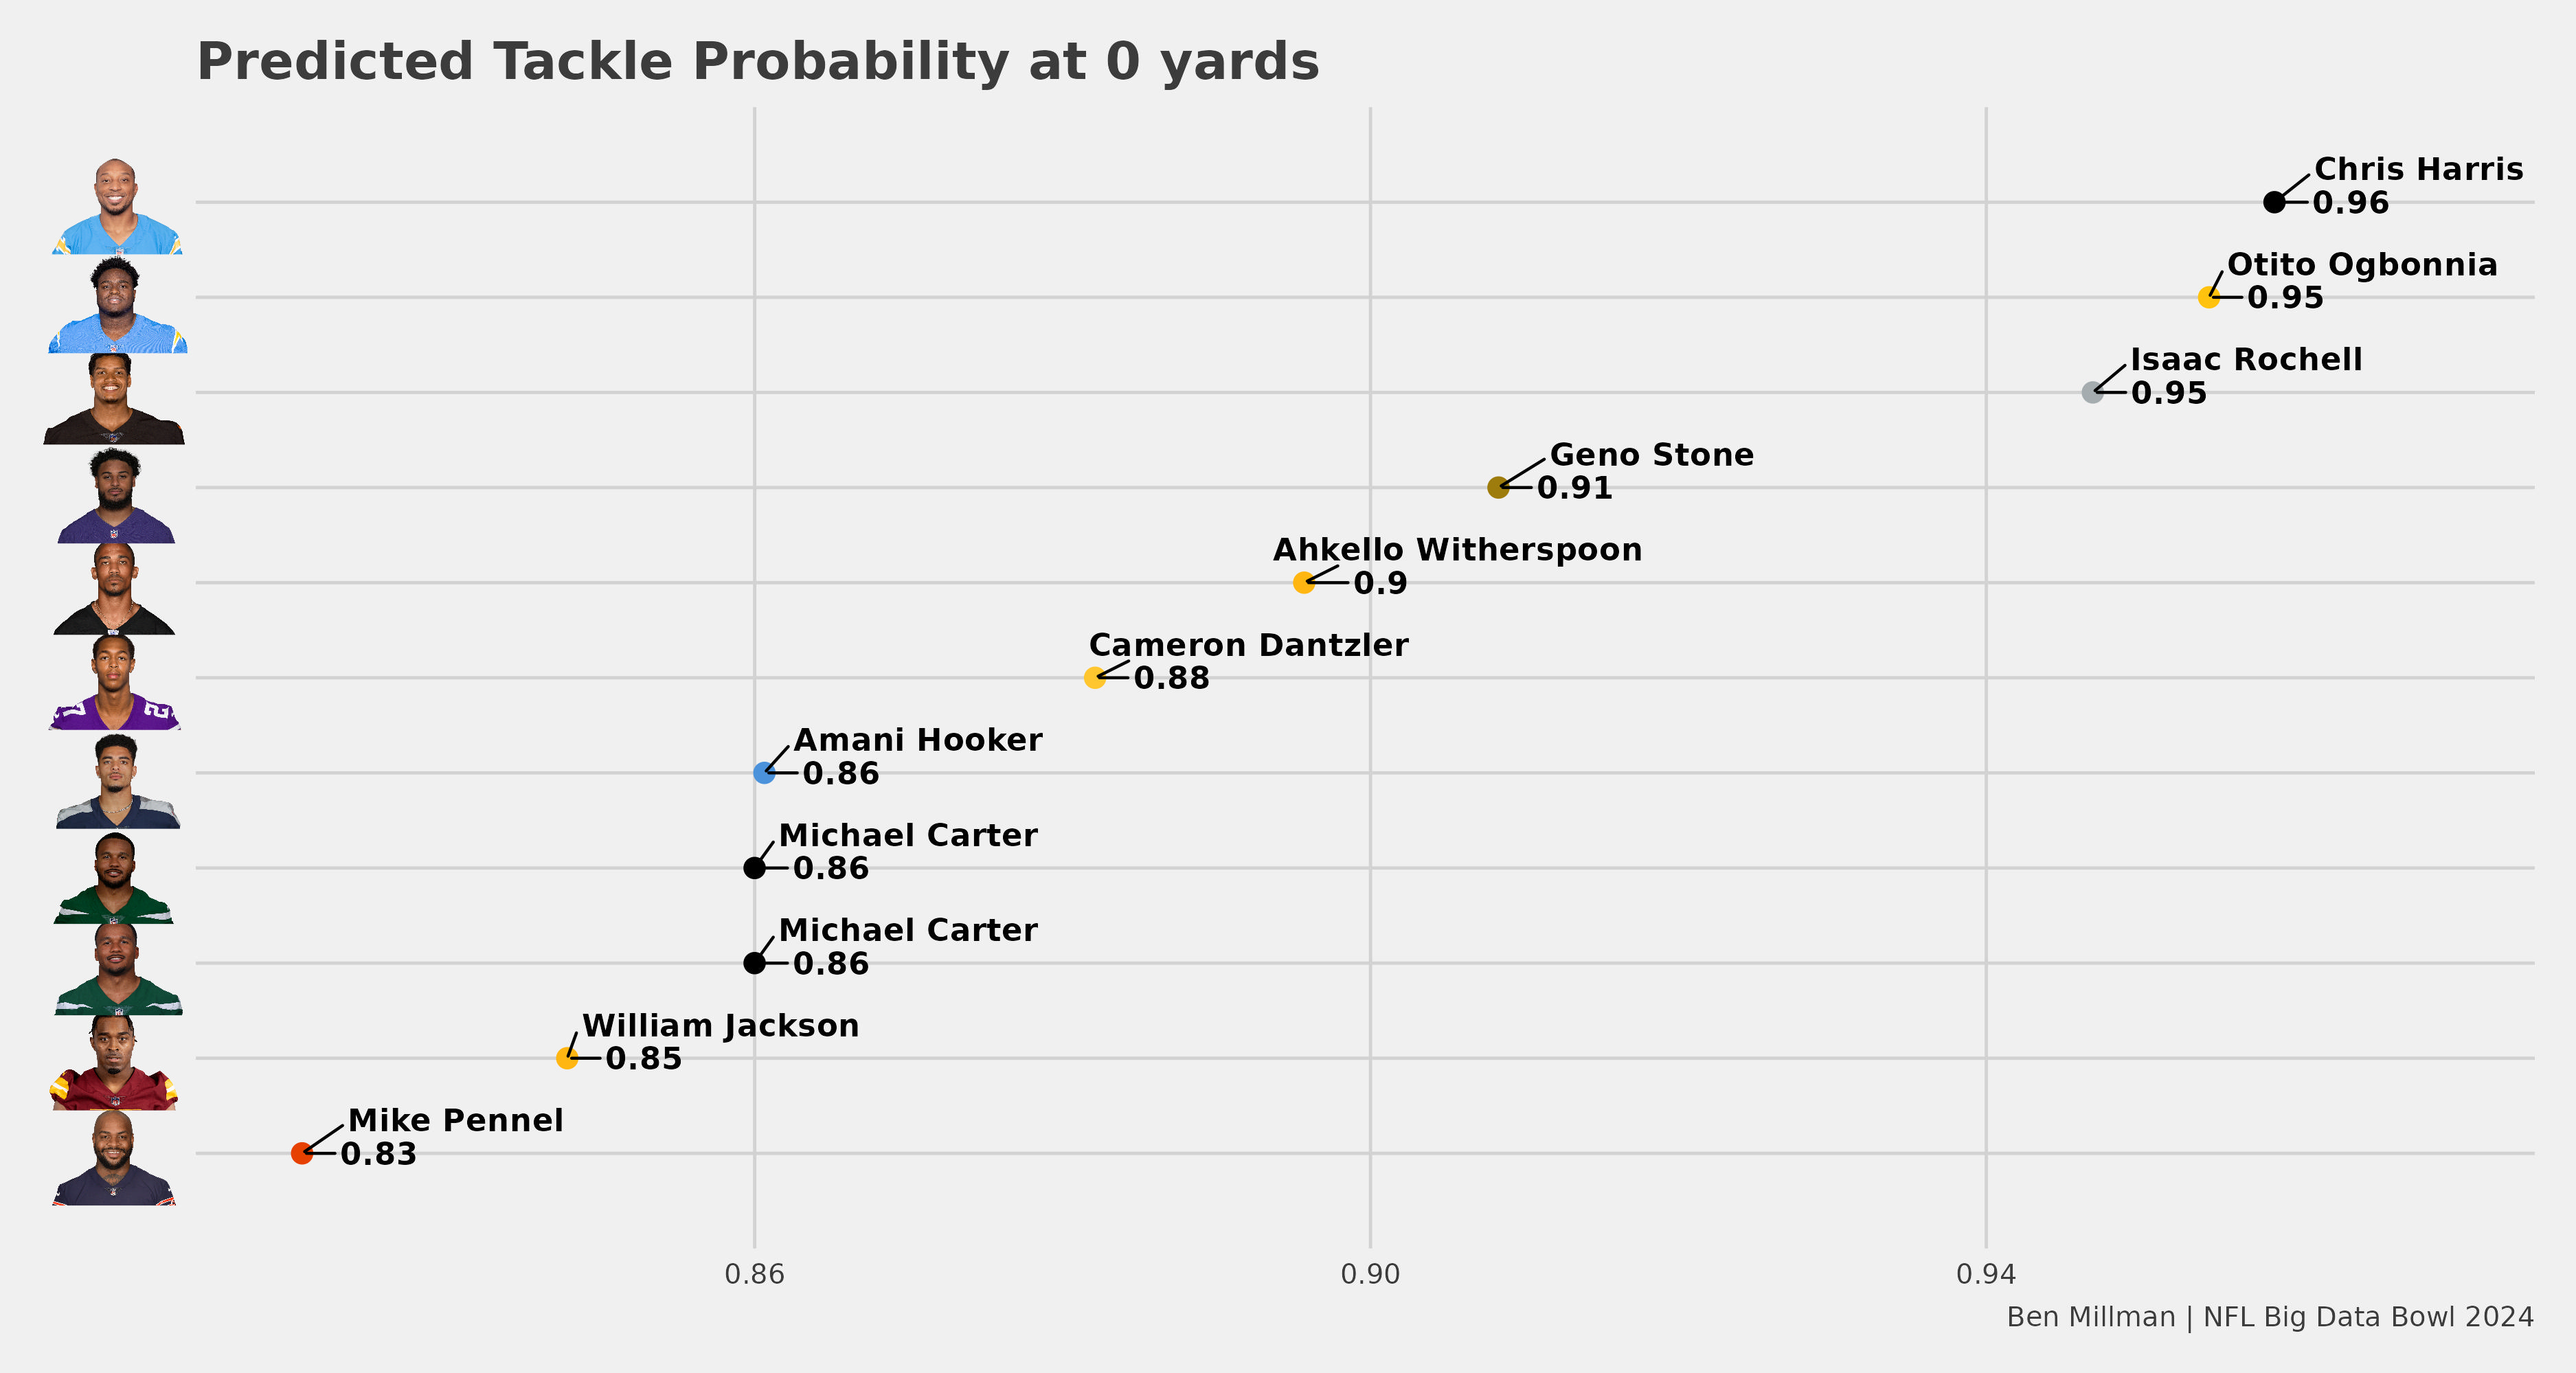

<div align="center"><strong>Figure 2:</strong> Top players by predicted tackle probability at 0 yards from the ball.</div></br>

### 2.3 Tackle Range

I defined tackle range as the distance at which a player is more likely to make than miss a tackle or $(P(tackle = 1) > .5)$, but this number could be modified for stricter results. Using the model I calculated the top players by tackle range. 

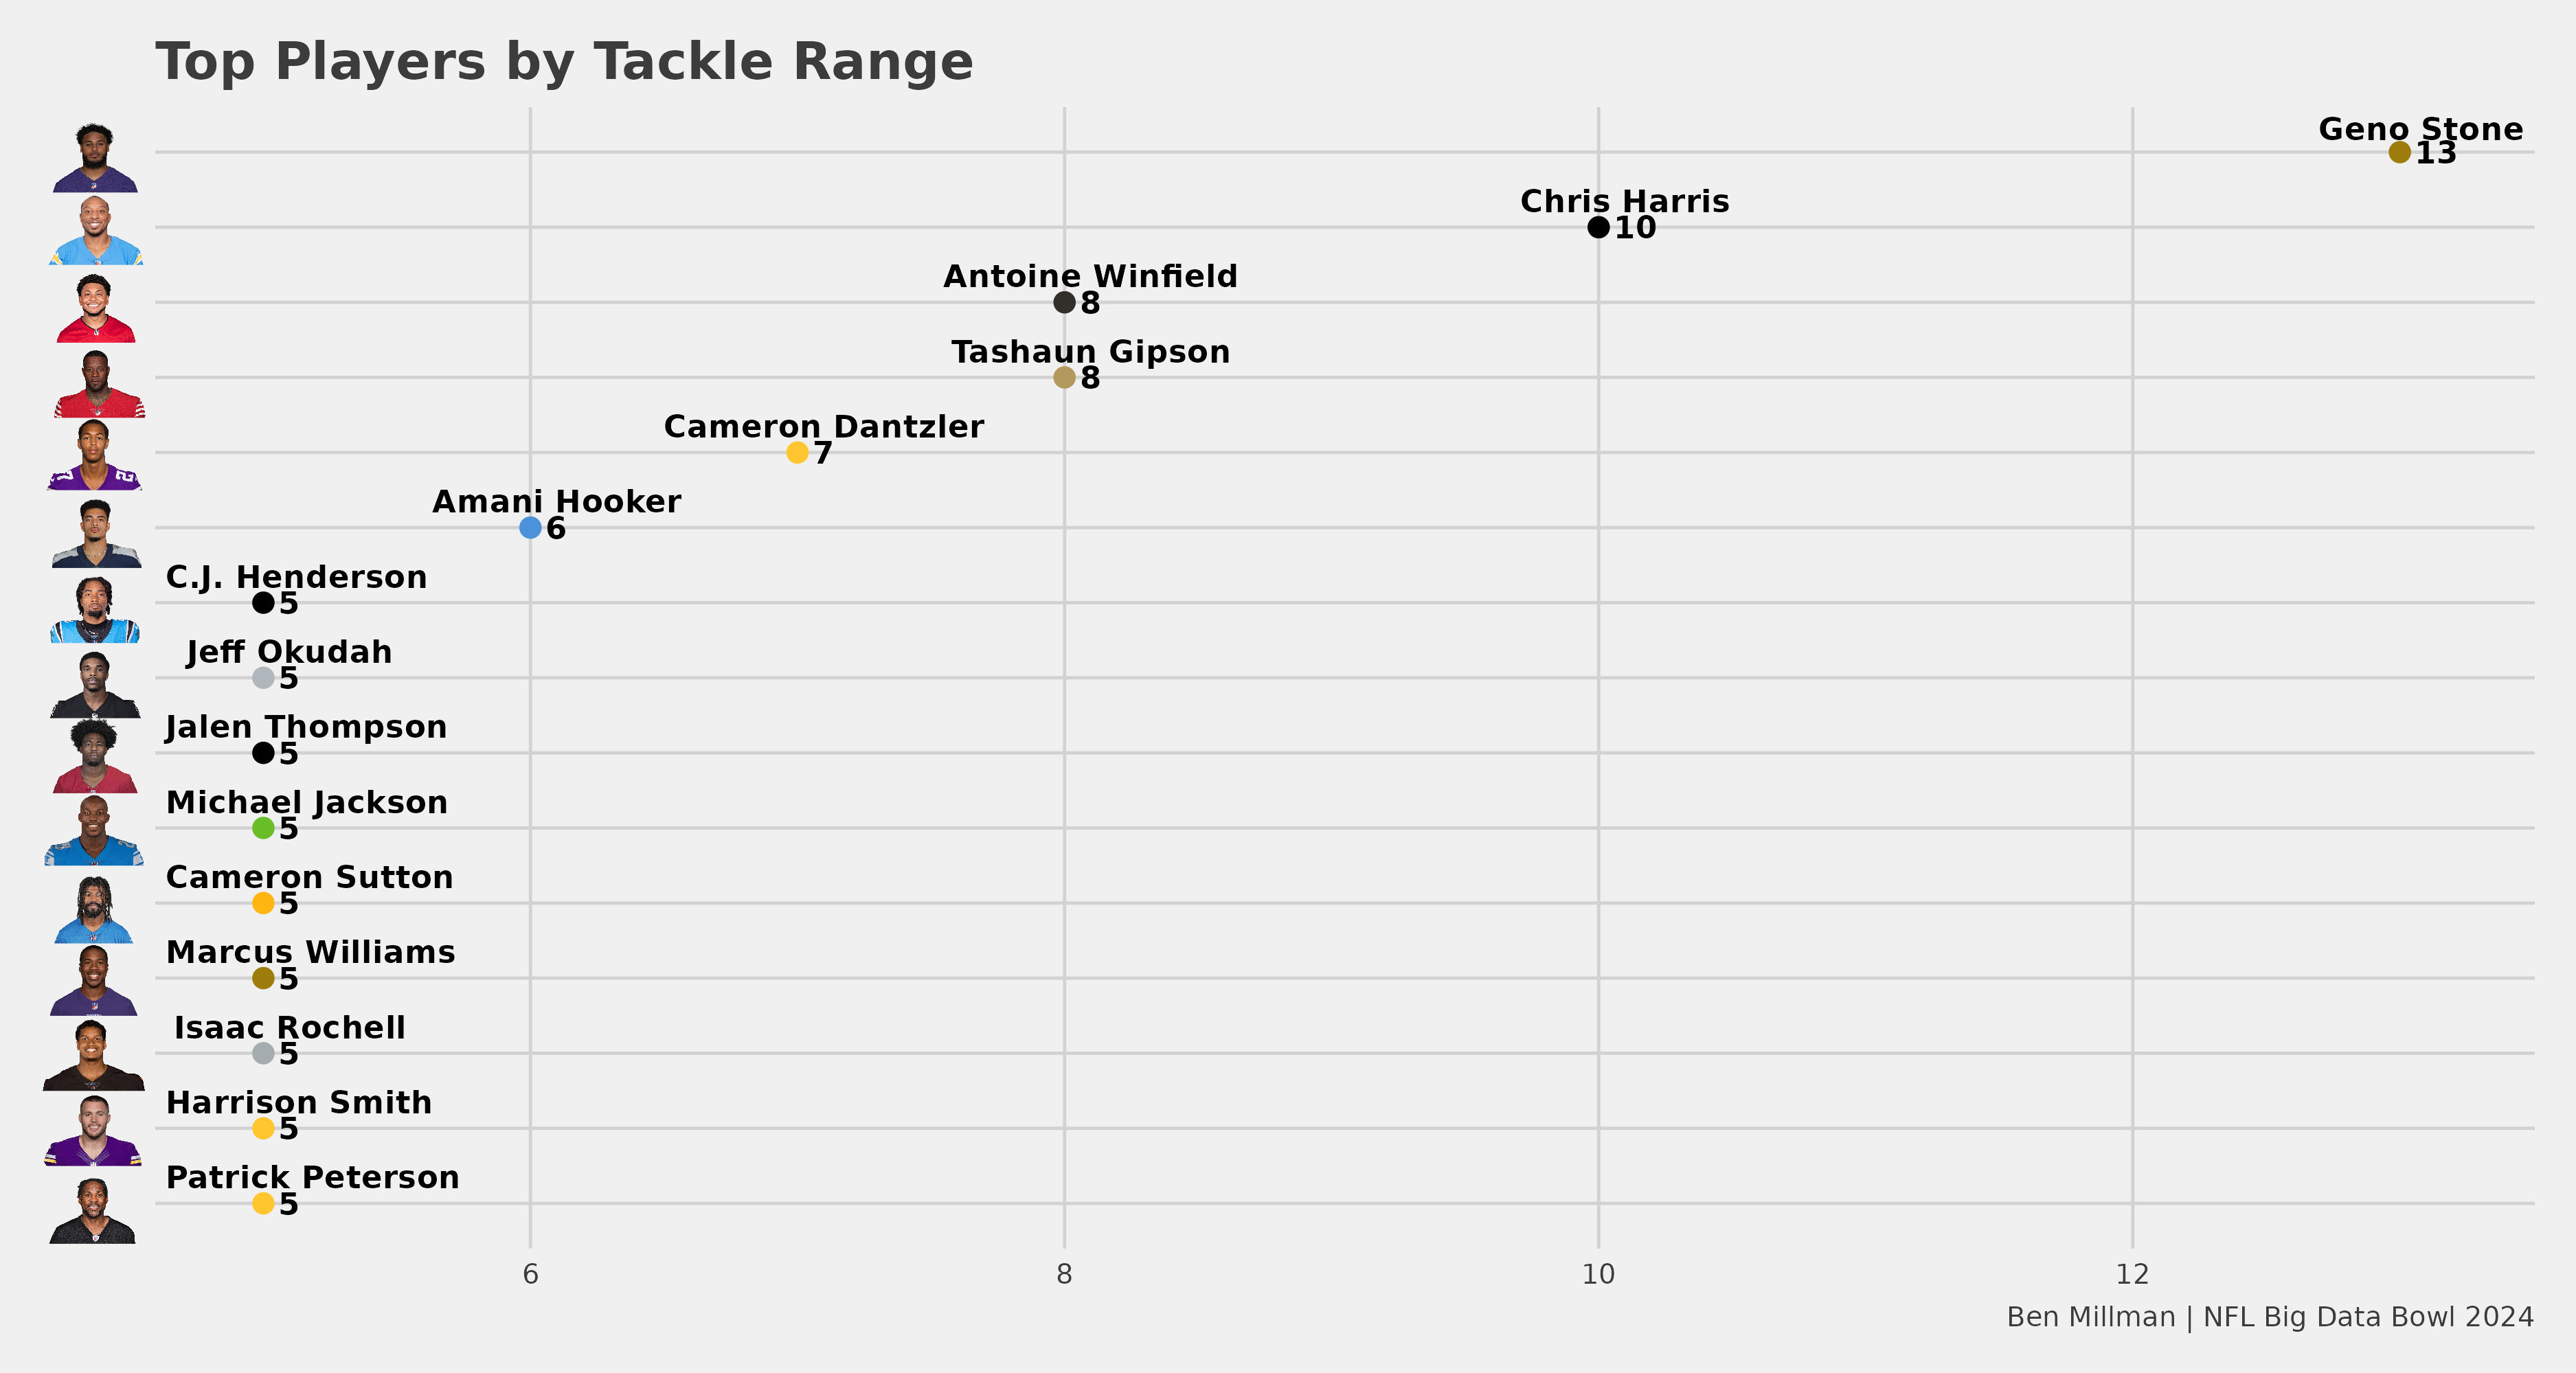
<div align="center"><strong>Figure 3:</strong> Top players by tackle range.</div></br>

As shown above, Geno Stone is more likely to make than miss a tackle starting at 13 yards from the ball.

## 3. Predicting Tackle Location and Quantifying Yards Saved

Estimating yards saved seems some what trivial at first, but upon further inspection, it's anything but. Even with this wealth of data it's very hard to try to extrapolate from when a tackle happened and guess what would've happened if it didn't. 

### 3.1 Modeling Tackle Location
I started with predicting the location of tackles. For complex, chronological tasks like this, a recurrent nueral network can be super useful. This was my approach. I combined all the positional data for all the players on every frame of each play into one entry in a 3D array, then with the actual location of the tackle I could train a neural network to predict the tackle location. I then split the data with 70% for training and 30% for testing. The model is comprised of the following:

* **A masking layer**: Because the plays all have different lengths, I had to pad all of the shorter plays to match the length of the longest one. The masking layer tells the model to ignore these padded sections
* **3 repeated bidirectional LTSM layers**: These are to capture complex chronological relationships
* **Dropout layers**: There is a dropout layer between each LTSM layer which turns off 30% of the nuerons in the network at random. This is to avoid overfitting.
* **A dense layer**: This reshapes and outputs the predictions.

Unfortunately I couldn't fully optimze the model due to a lack of resources and long compute time, but I got it to a point I'm satisfied with. Below are the results of my model's predictions on the test set. The blue represents the actual tackle location while red is the predicted location.

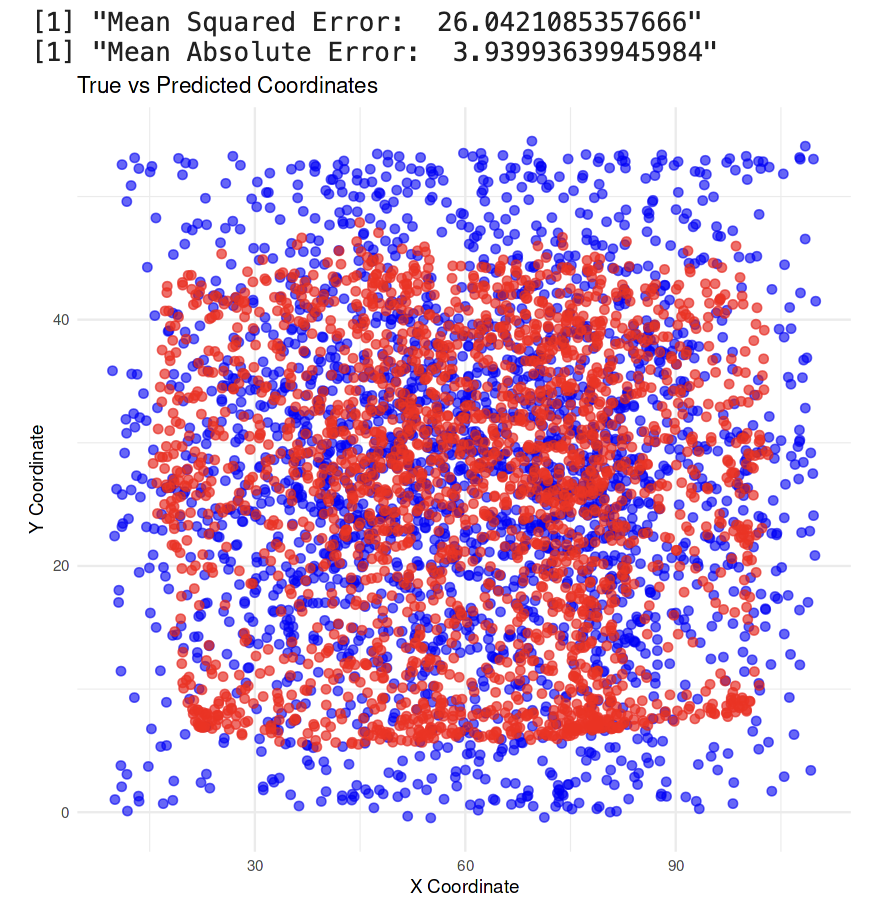
<div align="center"><strong>Figure 4:</strong> RNN performance on test set.</div></br>

As you can see, the underlying data is very noisy, but the model does a decent job at predicting the high density areas. 

 

### 3.2 Yards saved
As stated before, yards saved is a complex metric to calculate. For my aproach, I used the model for predicting tackle locations, but masked the players who actually made the tackle and re-predicted the tackle locations. The difference in X coordinates between the new prediction and the actual tackle location is the yards saved by that player. 

*This approach captures the essence of what I'd like it to, but is also capturing the effect of the defense having one less player meaning it's probably overestimating yards saved.*

Below is an animation of one of the most valuable tackles in the 2022 season. My methods estimate this tackle saved 68.3 yards

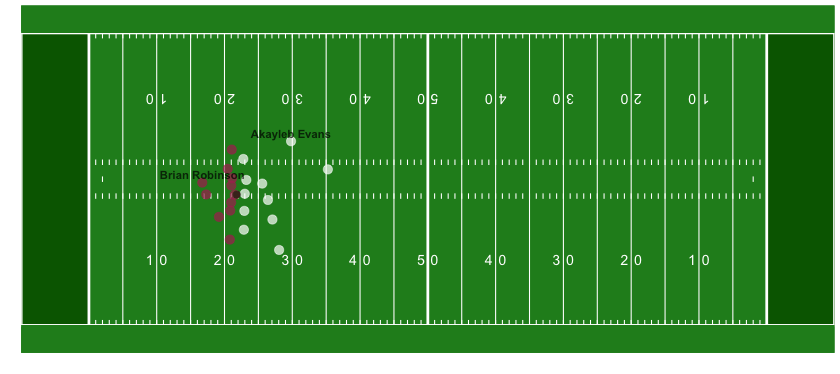
<div align="center"><strong>Figure 5:</strong> Animation of a high value tackle.</div></br>

Next I calculated the average yards saved for each player. Below are the top 10 players.

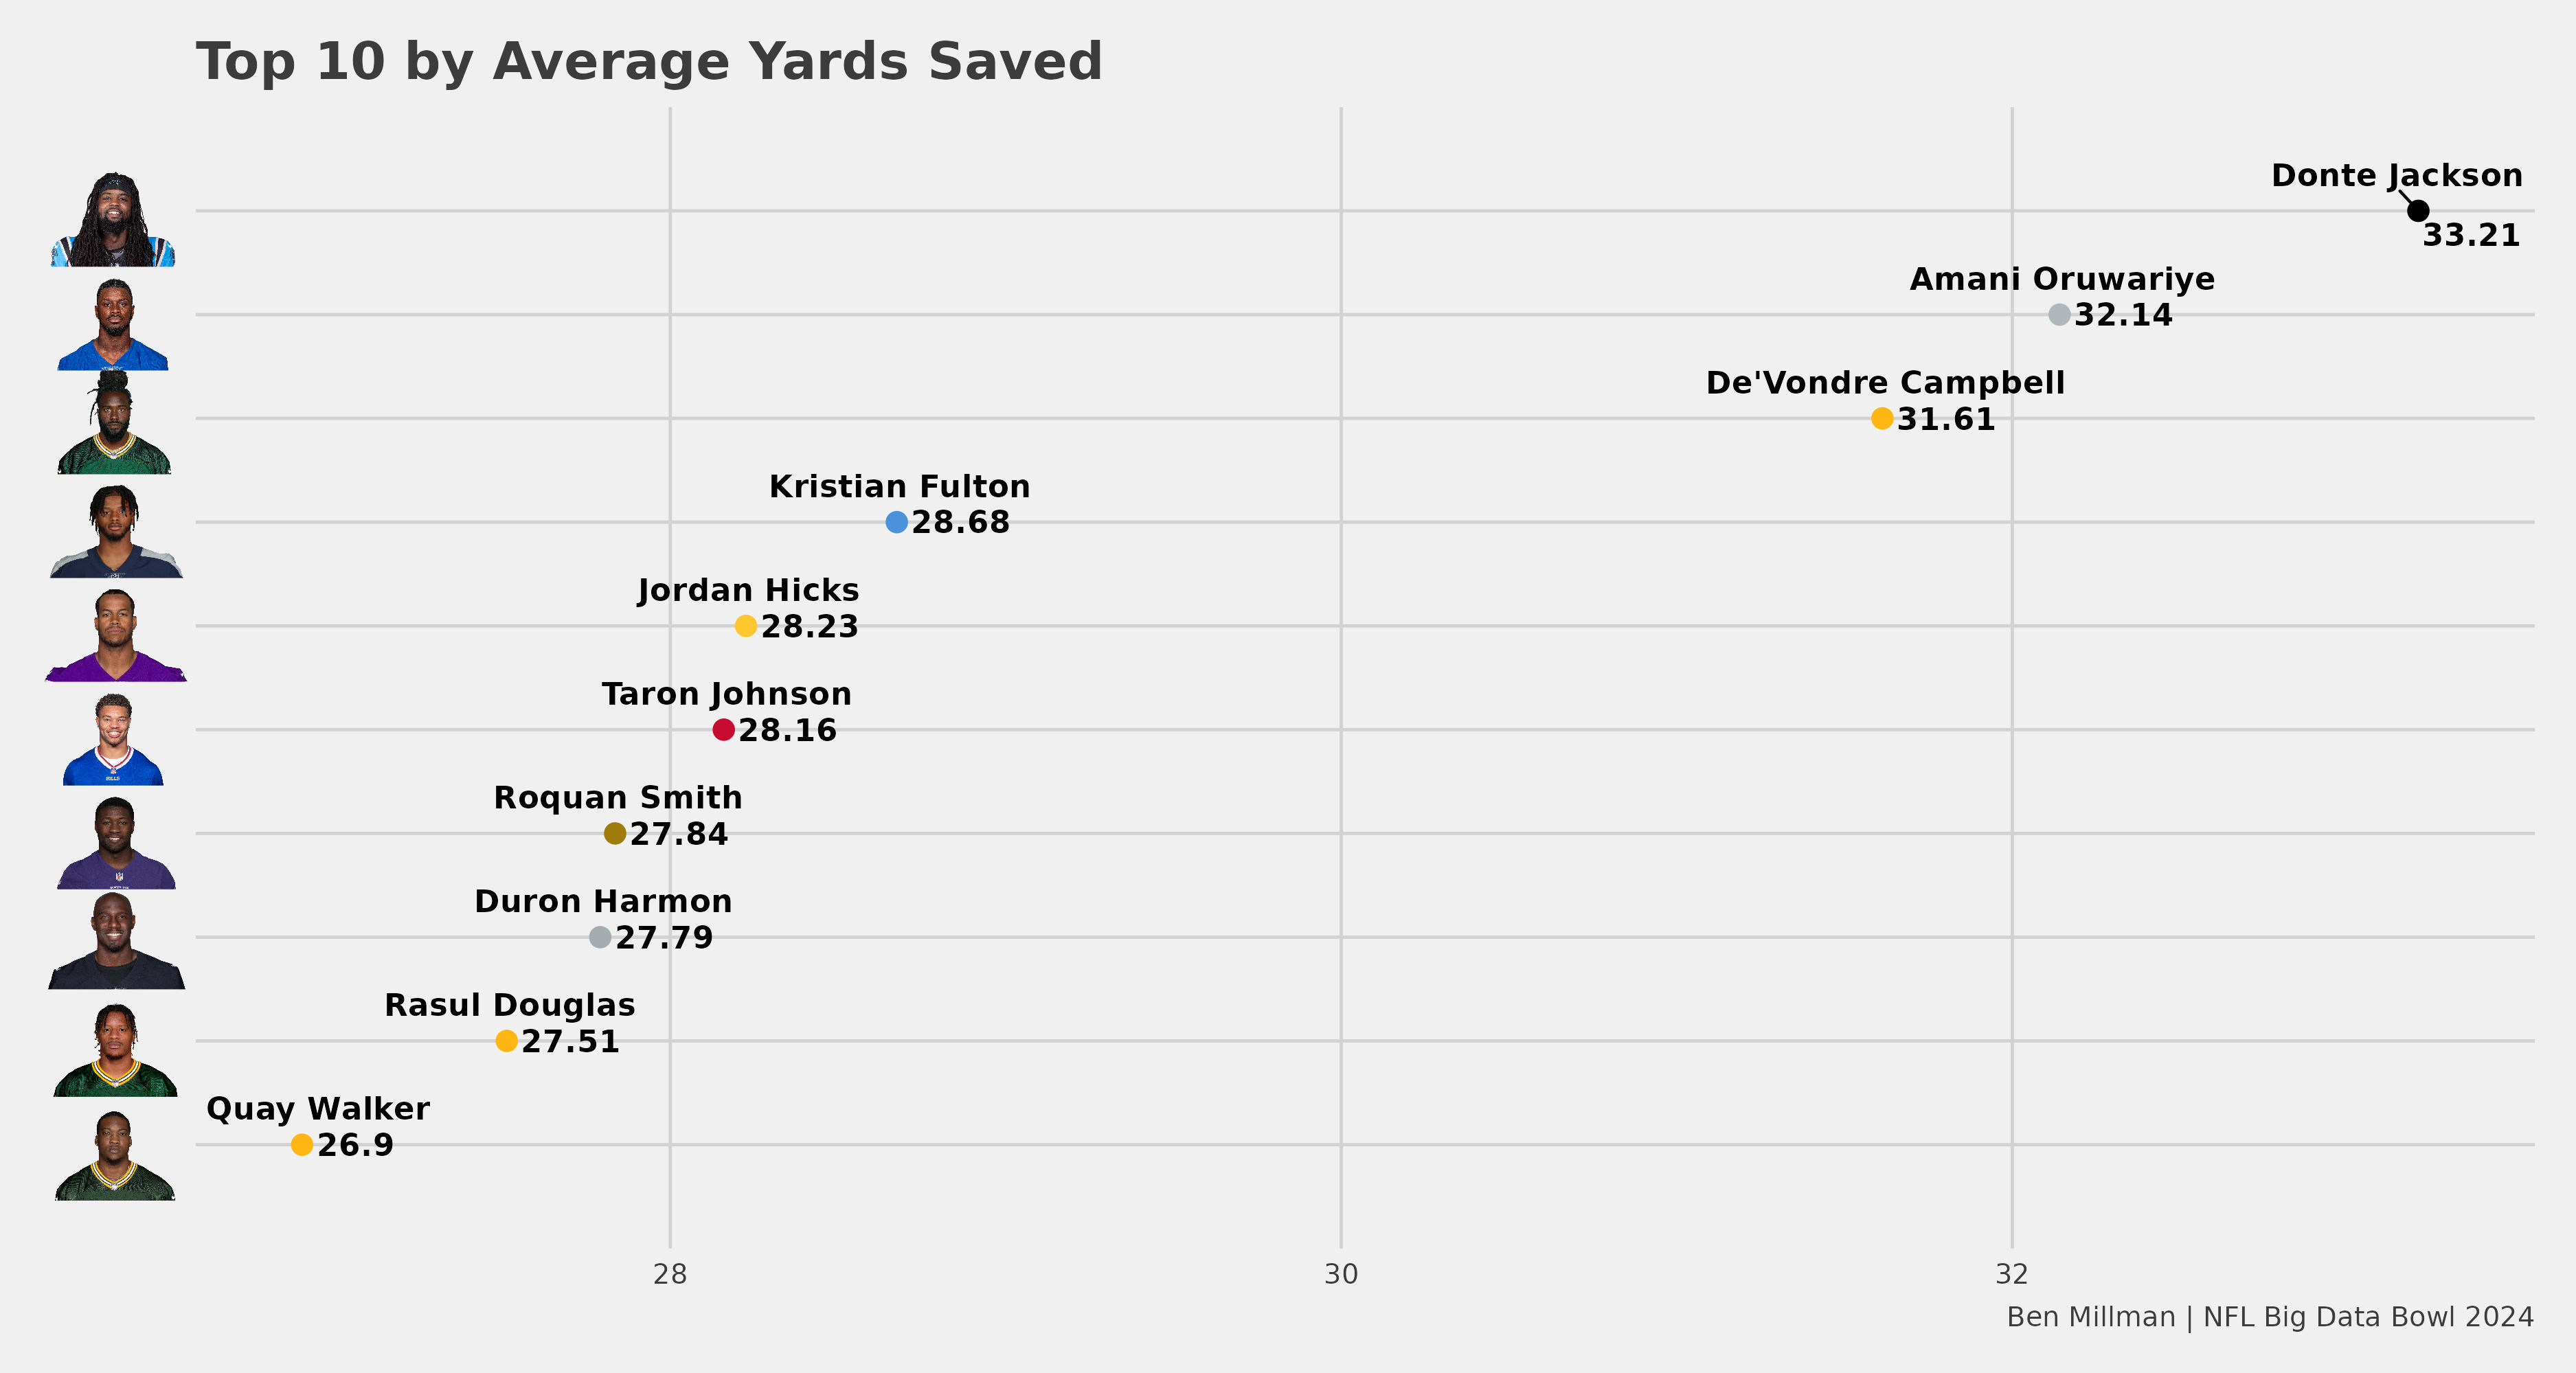
<div align="center"><strong>Figure 6:</strong> Top 10 players by average yards saved.</div></br>


## 4. Conclusions, Limitations, and Future Work
* **Tackle Range Improvement:** Converting the distance metrics from yards to feet or something else more granular could provide more seperation between players. Running logistic regression on data of this size is very computationally expensive, so I could only use the most relevant players, this shouldn't have much of an effect as the players that were left out had relatively few tackle opporotunities. 
* **Yards Saved Improvements:** As stated earlier, my approach also captures the effect of the defense having 1 fewer player. This could be improved through making the tackler miss versus masking them from the whole play. Also with more resources I could further optimize the RNN.
* **Conclusion**: This project was a great learning opportunity in which I got to combine 2 of my passions. I hope you found my project insightful!

[](http://)

## 5. Resources
This notebook by Kheirallah Samaha was super helpful in learning to use NFLverse for visualization and animation. 
https://www.kaggle.com/code/khsamaha/eda-animation-nflverse-nfl-2024-r/report